In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

/Users/hardika/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


58892288/58889256 [==============================] - 332s 6us/step


In [9]:
import numpy as np
import os
import time
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

In [10]:
PATH = os.getcwd()

In [11]:
data_path = PATH + '/FULL_FACE_TRAIN'

In [12]:
data_dir_list = os.listdir(data_path)

In [13]:
img_data_list=[]

In [14]:
for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = data_path + '/'+ dataset + '/'+ img
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
#		x = x/255
		#print('Input image shape:', x.shape)
		img_data_list.append(x)   

Loaded the images of dataset-Surprise face cropped

Loaded the images of dataset-Disgust face cropped

Loaded the images of dataset-Happy face cropped

Loaded the images of dataset-Contempt face cropped

Loaded the images of dataset-Angry face cropped

Loaded the images of dataset-Sad face cropped

Loaded the images of dataset-Fear face cropped



In [15]:
img_data = np.array(img_data_list) # takes time"
        
        # To bring data in the form (no. of images, row, col, channels)
        #print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
img_data=img_data[0]
       # print (img_data.shape) 

In [16]:
num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [17]:
labels[0:540]=0
labels[540:880]=1
labels[880:1495]=2
labels[1495:1611]=3
labels[1611:2043]=4
labels[2043:2363]=5
labels[2363:2600]=6

In [18]:
names = ['Surprised face','Sad face','Happy face','Fear face','Disgust face','Contempt face','Angry face']

In [19]:
Y = np_utils.to_categorical(labels, num_classes)

In [20]:
x,y = shuffle(img_data,Y, random_state=2) # TAKES TIME 
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2) 

# VGG16 MODEL

In [35]:
image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.layers[3].trainable

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [36]:
t=time.time()
#	t = now()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=25, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 1820 samples, validate on 780 samples
Epoch 1/25
1820/1820 [==============================] - 1115s 613ms/step - loss: 1.2376 - acc: 0.5802 - val_loss: 0.8241 - val_acc: 0.6872
Epoch 2/25
1820/1820 [==============================] - 1148s 631ms/step - loss: 0.5824 - acc: 0.7879 - val_loss: 0.4924 - val_acc: 0.8410
Epoch 3/25
1820/1820 [==============================] - 1159s 637ms/step - loss: 0.3655 - acc: 0.8769 - val_loss: 0.4485 - val_acc: 0.8410
Epoch 4/25
1820/1820 [==============================] - 1180s 648ms/step - loss: 0.2723 - acc: 0.9143 - val_loss: 0.3802 - val_acc: 0.8526
Epoch 5/25
1820/1820 [==============================] - 1170s 643ms/step - loss: 0.2129 - acc: 0.9291 - val_loss: 0.3184 - val_acc: 0.8897
Epoch 6/25
1820/1820 [==============================] - 1170s 643ms/step - loss: 0.1591 - acc: 0.9577 - val_loss: 0.1860 - val_acc: 0.9410
Epoch 7/25
1820/1820 [==============================] - 1162s 639ms/step - loss: 0.1203 - acc: 0.9665 - val_loss: 0.194

In [37]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
#K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

import numpy as np
import os
import time
from keras.preprocessing import image
from imagenet_utils import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

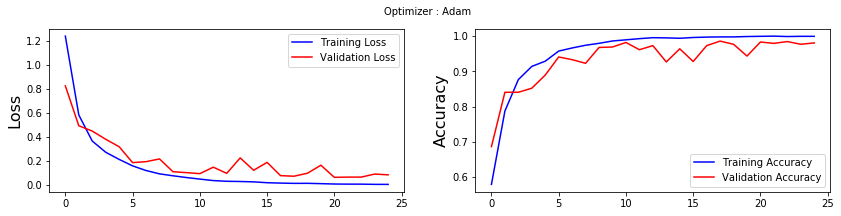

In [38]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [40]:
Y_pred = custom_vgg_model.predict(X_test)

In [41]:
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)


[2 4 2 4 5 2 0 1 1 2 5 2 4 4 0 6 1 5 4 2 5 1 1 1 4 4 6 5 4 4 6 6 0 5 1 4 2
 1 0 2 0 1 6 5 4 0 1 2 2 0 2 5 0 0 4 0 0 5 1 1 4 6 5 5 4 4 4 2 5 4 5 4 0 1
 0 0 2 2 2 5 2 3 2 2 0 5 4 4 4 4 5 2 2 0 0 6 2 4 6 1 4 6 4 0 0 5 6 2 4 1 0
 5 1 2 6 4 0 4 6 2 0 0 0 2 0 5 1 5 0 4 0 0 5 2 1 0 2 2 5 1 6 0 4 6 3 2 2 0
 2 1 2 3 0 0 0 2 6 4 6 4 0 2 2 2 6 5 4 5 2 1 0 6 2 2 4 0 5 2 4 2 4 3 1 5 6
 5 1 2 4 2 4 1 1 1 2 2 0 0 1 2 4 5 5 4 2 1 2 2 5 0 2 4 0 4 0 2 2 4 4 0 0 5
 4 5 4 6 2 3 1 5 5 0 5 2 4 2 2 0 2 4 0 1 2 3 4 5 1 5 3 0 2 5 5 2 2 0 0 0 6
 5 3 5 0 2 2 3 2 6 4 1 0 0 5 1 1 6 4 0 4 2 5 4 3 3 6 0 1 3 4 3 5 4 0 4 4 2
 0 0 5 2 4 3 6 2 6 0 1 0 2 0 4 0 4 5 4 1 4 0 5 2 5 2 6 0 2 0 0 2 2 0 4 4 2
 4 2 0 0 0 1 4 4 3 1 5 0 4 5 5 0 6 0 1 2 2 5 0 2 0 5 2 2 5 4 6 2 0 5 4 5 0
 3 5 5 2 5 4 1 1 4 2 1 1 4 2 5 5 2 2 0 1 6 2 0 4 6 1 0 1 2 5 2 1 5 0 2 6 4
 0 6 4 2 4 5 4 2 2 3 2 4 2 2 5 1 5 2 2 2 6 2 3 0 2 1 4 2 2 2 0 5 2 0 5 5 1
 0 2 5 4 5 4 2 4 0 4 6 0 4 5 1 0 3 0 0 5 1 1 4 2 2 5 2 0 1 5 0 3 4 0 1 5 0
 2 2 4 5 3 6 0 1 0 4 5 2 

In [42]:
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=names))

                precision    recall  f1-score   support

Surprised face       1.00      0.99      0.99       157
      Sad face       0.98      0.97      0.97        96
    Happy face       0.99      1.00      1.00       192
     Fear face       0.97      0.91      0.94        33
  Disgust face       0.95      1.00      0.97       122
 Contempt face       0.97      0.99      0.98       113
    Angry face       1.00      0.91      0.95        67

   avg / total       0.98      0.98      0.98       780



In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       # cm=round(cm,3)
        
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[155   1   0   0   0   1   0]
 [  0  93   0   0   2   1   0]
 [  0   0 192   0   0   0   0]
 [  0   0   0  30   3   0   0]
 [  0   0   0   0 122   0   0]
 [  0   0   0   1   0 112   0]
 [  0   1   1   0   2   2  61]]


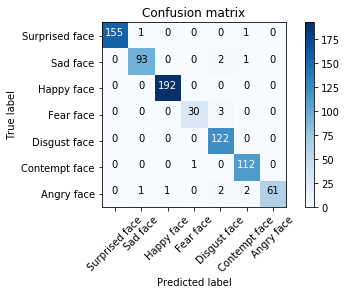

In [44]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
plot_confusion_matrix(cnf_matrix, classes=names, normalize=False,title='Confusion matrix')
#plt.figure()
plt.show()

# STORING THE WEIGHTS
fname="Weights-Full_Face_7class_25_epochs_vgg16.hdf5"
custom_vgg_model.save_weights(fname,overwrite=True)


#  LOADING WEIGHTS
fname= "Weights-Full_Face_7class_25_epochs_vgg16.hdf5"
custom_vgg_model.load_weights(fname)
        